In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [95]:
df = pd.read_csv('/Users/austi/Documents/QTW/Case Study 7/final_project(5).csv')
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,...,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858,1
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,...,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952,0
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,...,-0.346570,-0.144098,0.738298,7.241041,0.215347,-12.155249,3.265263,1.230963,3.335471,1
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,...,-0.307656,-0.601145,-3.443112,0.549931,0.206728,5.081980,1.701462,-0.279619,-1.986424,0


In [96]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [98]:
missing_values = df.isnull().sum()

for col in df.columns:
    if missing_values[col] > 0:
        print(f"{col}: {missing_values[col]} missing values")


x0: 26 missing values
x1: 25 missing values
x2: 38 missing values
x3: 37 missing values
x4: 26 missing values
x5: 37 missing values
x6: 26 missing values
x7: 27 missing values
x8: 21 missing values
x9: 30 missing values
x10: 43 missing values
x11: 30 missing values
x12: 36 missing values
x13: 31 missing values
x14: 34 missing values
x15: 35 missing values
x16: 26 missing values
x17: 27 missing values
x18: 40 missing values
x19: 35 missing values
x20: 38 missing values
x21: 29 missing values
x22: 27 missing values
x23: 47 missing values
x24: 28 missing values
x25: 22 missing values
x26: 36 missing values
x27: 30 missing values
x28: 35 missing values
x29: 30 missing values
x30: 30 missing values
x31: 39 missing values
x32: 31 missing values
x33: 41 missing values
x34: 41 missing values
x35: 30 missing values
x36: 27 missing values
x37: 23 missing values
x38: 31 missing values
x39: 23 missing values
x40: 36 missing values
x41: 40 missing values
x42: 26 missing values
x43: 37 missing value

In [99]:
float_columns = df.select_dtypes(include=['float64']).columns

df[float_columns] = df[float_columns].fillna(df[float_columns].mean())

missing_values = df.isnull().sum()

for col in df.columns:
    if missing_values[col] > 0:
        print(f"{col}: {missing_values[col]} missing values")


x24: 28 missing values
x29: 30 missing values
x30: 30 missing values
x32: 31 missing values
x37: 23 missing values


In [100]:
df_dropped = df.dropna()

df_dropped.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,...,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000,159858.000000
mean,-0.001005,0.001604,-1.148252,-0.023624,-0.000378,0.014244,-1.667917,-7.691989,-0.030356,0.005283,...,6.701846,-1.833269,-0.001824,-0.006497,0.000870,-12.755131,0.028799,-0.000489,-0.674718,0.401206
std,0.371085,6.339676,13.272793,8.063739,6.382385,7.669361,19.298389,30.540974,8.900851,6.354096,...,18.678855,5.110377,1.534708,4.163655,0.396589,36.605284,4.787313,1.935421,15.035853,0.490144
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251486,-4.259745,-10.162528,-5.451464,-4.312209,-5.146737,-14.775552,-27.320871,-6.031295,-4.259022,...,-5.801475,-5.161662,-1.038994,-2.811506,-0.266498,-36.426279,-3.214651,-1.320770,-10.930197,0.000000
50%,-0.001938,0.004013,-1.335389,-0.027796,-0.000136,0.013582,-1.941836,-6.960668,-0.019629,0.005462,...,6.837119,-1.922344,-0.003747,-0.009919,0.001580,-12.974033,0.035155,-0.011993,-0.578234,0.000000
75%,0.248482,4.282927,7.873124,5.445248,4.306729,5.190083,11.448420,12.215782,5.972997,4.304122,...,19.264300,1.453444,1.033105,2.781815,0.268961,11.438814,3.267105,1.317186,9.648138,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


## We see some missing values that we will have to deal with


# all of the missing values are pretty low (between 20 & 40) so maybe just drop? .025% of the data is 40 missing values. 

# above i imputed with mean
# 137 missing values is .085625% of the data

In [101]:
categorical_columns = df_dropped.select_dtypes(include = ['object']).columns

for col in categorical_columns:
    unique_values = df_dropped[col].unique()
    unique_count = len(unique_values)
    print(f"Unique values in {col} ({unique_count} unique values): \n{unique_values}\n\n")


Unique values in x24 (3 unique values): 
['euorpe' 'asia' 'america']


Unique values in x29 (12 unique values): 
['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' 'Mar' 'Feb' 'Dev'
 'January']


Unique values in x30 (5 unique values): 
['tuesday' 'wednesday' 'thurday' 'monday' 'friday']


Unique values in x32 (12 unique values): 
['0.0%' '-0.02%' '-0.01%' '0.01%' '-0.03%' '0.02%' '-0.0%' '-0.04%'
 '0.03%' '0.04%' '-0.05%' '0.05%']


Unique values in x37 (129112 unique values): 
['$1313.96' '$1962.78' '$430.47' ... '$1588.65' '$439.21' '$-1229.34']




## money is going to be something to think about (just convert to float?) other objects shouldnt be too hard to one hot encode or similar

## december is spelled dev (just an insight.. wont matter in the end)

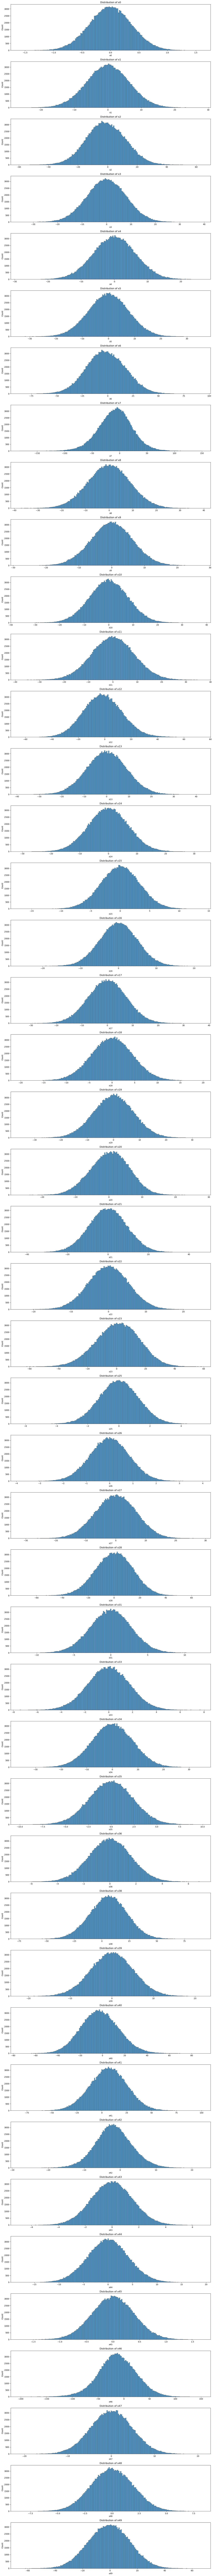

In [102]:
float_columns = df_dropped.select_dtypes(include=['float64']).columns
num_columns = len(float_columns)

plt.figure(figsize=(15, 4 * num_columns))
for i, col in enumerate(float_columns, 1):
    plt.subplot(num_columns, 1, i)
    sns.histplot(df_dropped[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


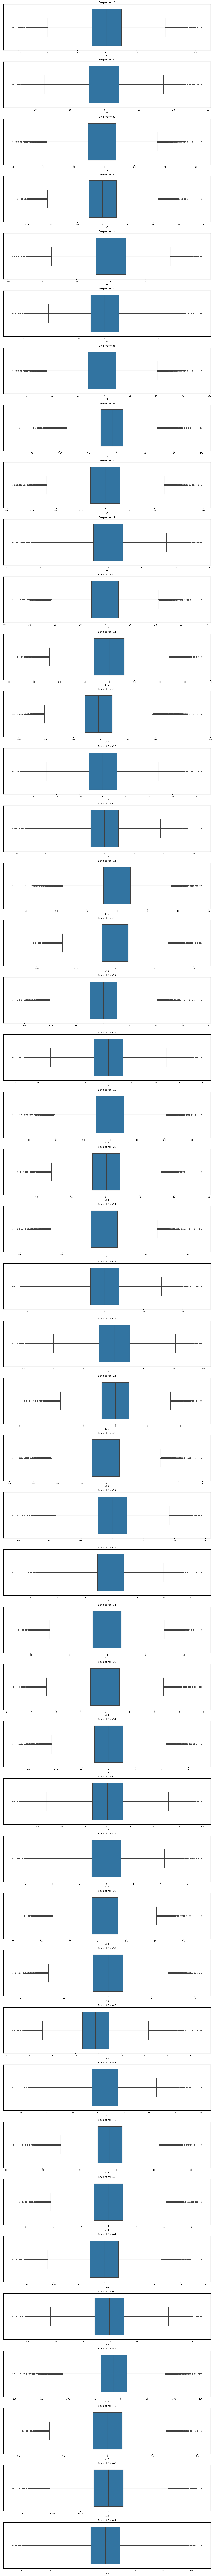

In [103]:
plt.figure(figsize=(15, 4 * len(float_columns)))
for i, col in enumerate(float_columns, 1):
    plt.subplot(len(float_columns), 1, i)
    sns.boxplot(x = df_dropped[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


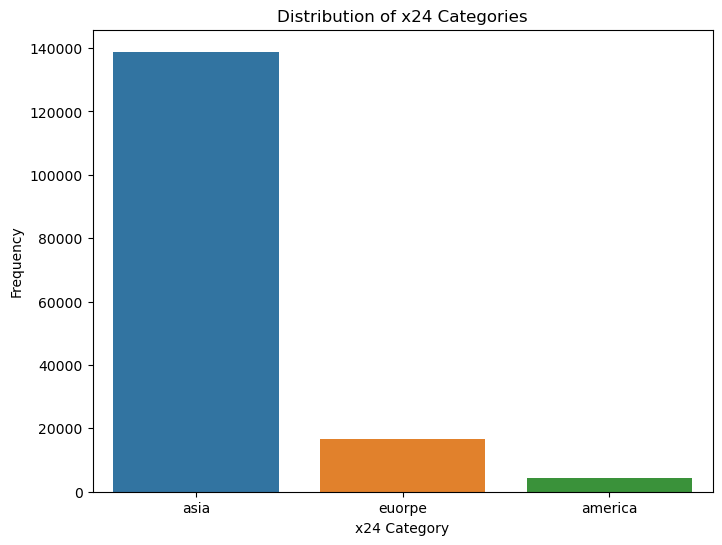

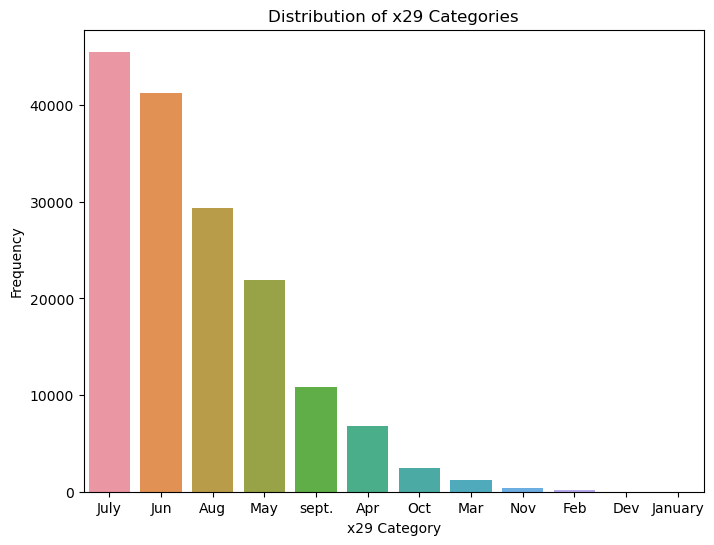

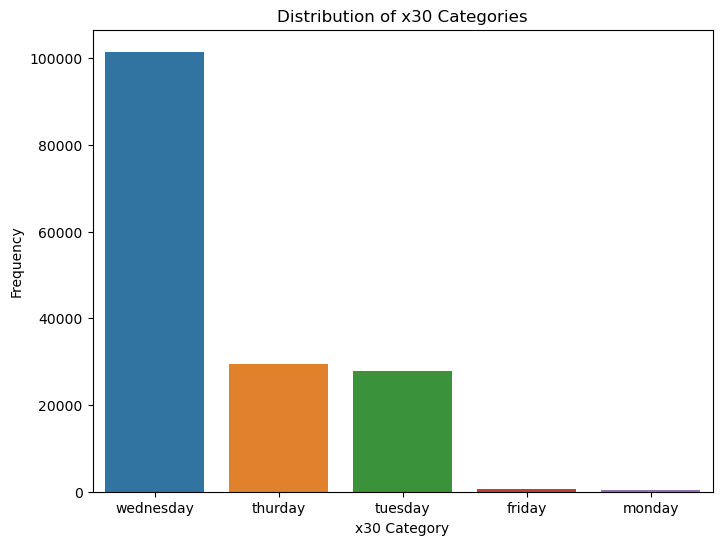

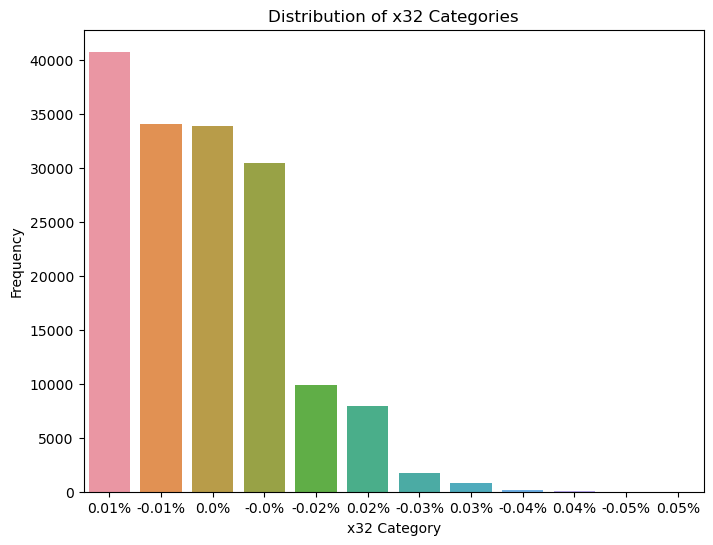

In [104]:
plt.figure(figsize = (8, 6))
sns.barplot(x = df_dropped['x24'].value_counts().index, y = df_dropped['x24'].value_counts().values)
plt.title('Distribution of x24 Categories')
plt.xlabel('x24 Category')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize = (8, 6))
sns.barplot(x = df_dropped['x29'].value_counts().index, y = df_dropped['x29'].value_counts().values)
plt.title('Distribution of x29 Categories')
plt.xlabel('x29 Category')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize = (8, 6))
sns.barplot(x = df_dropped['x30'].value_counts().index, y = df_dropped['x30'].value_counts().values)
plt.title('Distribution of x30 Categories')
plt.xlabel('x30 Category')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize = (8, 6))
sns.barplot(x = df_dropped['x32'].value_counts().index, y = df_dropped['x32'].value_counts().values)
plt.title('Distribution of x32 Categories')
plt.xlabel('x32 Category')
plt.ylabel('Frequency')
plt.show()

## is 95000:64000 a data imbalance?

In [105]:
df_dropped['y'].value_counts()

y
0    95722
1    64136
Name: count, dtype: int64

In [106]:
df_dropped['x37'] = df_dropped['x37'].str[1:]

df_dropped['x37'] = df_dropped['x37'].astype(float)

df_dropped = pd.get_dummies(df_dropped, columns = ['x24', 'x29', 'x30', 'x32'])

df_encoded = df_dropped.astype(int)

df_encoded

C:\Users\austi\AppData\Local\Temp\ipykernel_12932\988149382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['x37'] = df_dropped['x37'].str[1:]
C:\Users\austi\AppData\Local\Temp\ipykernel_12932\988149382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['x37'] = df_dropped['x37'].astype(float)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32_-0.02%,x32_-0.03%,x32_-0.04%,x32_-0.05%,x32_0.0%,x32_0.01%,x32_0.02%,x32_0.03%,x32_0.04%,x32_0.05%
0,0,-3,4,2,-1,0,6,-14,-1,-4,...,0,0,0,0,1,0,0,0,0,0
1,0,0,27,4,6,-2,40,-6,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,-1,12,6,-5,-11,17,11,5,-2,...,0,0,0,0,0,0,0,0,0,0
3,0,5,-24,3,6,2,-35,-18,0,-5,...,0,0,0,0,0,1,0,0,0,0
4,0,0,-11,1,2,0,-16,27,1,-4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,0,-4,0,-1,1,-1,0,41,-1,-2,...,0,0,0,0,1,0,0,0,0,0
159996,0,4,22,11,1,6,32,-12,-3,6,...,0,0,0,0,0,0,0,0,0,0
159997,0,5,7,-7,2,-2,10,42,1,6,...,0,0,0,0,0,0,0,0,0,0
159998,0,7,5,-2,4,15,7,-10,2,4,...,1,0,0,0,0,0,0,0,0,0


In [107]:
X = df_encoded.drop('y', axis = 1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


In [108]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9187413987238834


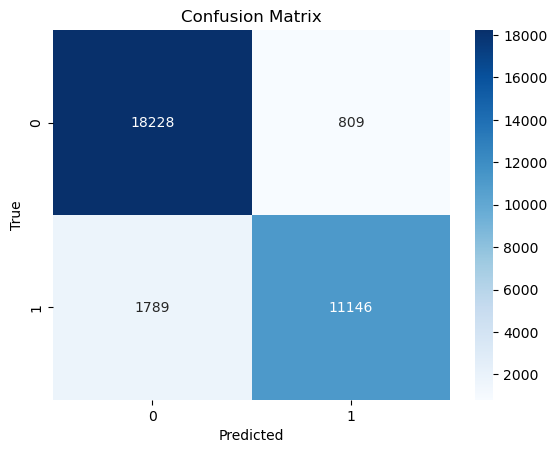

In [109]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## (809 * 100) + (1789 * 25) = 125,625 dollar loss
## this is done on 20% of the data so we multiply by 5 and we get total loss of 
## 628,125 dollars

In [110]:
feature_importances = rf_classifier.feature_importances_

for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

x0: 0.000302521256796031
x1: 0.009336416050173511
x2: 0.028185988906480684
x3: 0.00965371313909074
x4: 0.009257706903909188
x5: 0.009731814349605948
x6: 0.03087357624905421
x7: 0.04166670303742525
x8: 0.009967757074078145
x9: 0.009305515451688359
x10: 0.009648869579266474
x11: 0.009844002890573493
x12: 0.04770998895079529
x13: 0.010078676855116358
x14: 0.009413606769614355
x15: 0.007711370444737594
x16: 0.008865763138468182
x17: 0.009594390714697415
x18: 0.008656331378680654
x19: 0.009688769424176806
x20: 0.05688125771315734
x21: 0.01004796397788291
x22: 0.009144941055800396
x23: 0.0721083460685694
x25: 0.0043576112526037755
x26: 0.0029268283562293145
x27: 0.0418273662579408
x28: 0.047317448186934945
x31: 0.0073072523681736645
x33: 0.005766013544465976
x34: 0.009659868107609515
x35: 0.006813808828940209
x36: 0.00531031920306531
x37: 0.04704097363553558
x38: 0.03554259578965675
x39: 0.008958117233806457
x40: 0.04481549106547223
x41: 0.0351120738914021
x42: 0.04539566494718982
x43: 0.005

In [111]:
# top 10 

top_10_indices = feature_importances.argsort()[-10:][::-1]  

for index in top_10_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

x23: 0.0721083460685694
x49: 0.05719894468953766
x20: 0.05688125771315734
x12: 0.04770998895079529
x28: 0.047317448186934945
x37: 0.04704097363553558
x42: 0.04539566494718982
x40: 0.04481549106547223
x48: 0.04479949422261029
x27: 0.0418273662579408
